In [2]:
# Numpy library to use matrices
import numpy as np
import cv2

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [14]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure(figsize = (8,8))
#     plt.axis('off')
    plt.imshow(canvas) 
    plt.title(title)
    
def reset_canvas(size):
    # Color image
    return np.ones((size,size,3), dtype=np.uint8) * 255
    


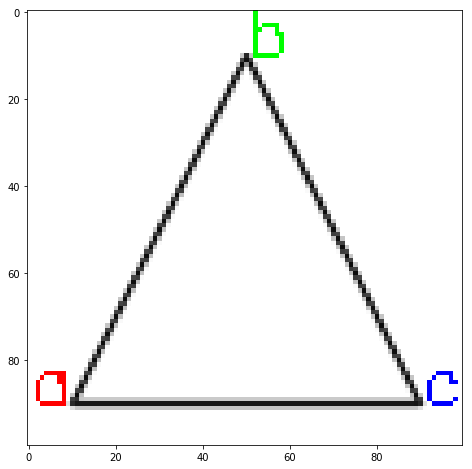

In [49]:
# Draw a triangle


def triangle(canvas, x0, x1, x2):
    X = np.array([[x0, x1, x2, x0]], np.int32)
    for i in range(len(X[0])):
        canvas = cv2.line(canvas, tuple(X[0][i-1]), tuple(X[0][i]), (0,0,0), 1, cv2.LINE_AA)

    font = cv2.FONT_HERSHEY_SIMPLEX
    canvas = cv2.putText(canvas, "a", tuple(x0 - np.array([10,0])), font, 0.5, (255, 0, 0))
    canvas = cv2.putText(canvas, "b", tuple(x1), font, 0.5, (0, 255, 0))
    canvas = cv2.putText(canvas, "c", tuple(x2), font, 0.5, (0, 0, 255))
    return canvas
                         
canvas = reset_canvas(N)                         
x0 = np.array([10, 90])
x1 = np.array([50, 10])
x2 = np.array([90, 90])                         
canvas = triangle(canvas, x0, x1, x2)
show_canvas(canvas)

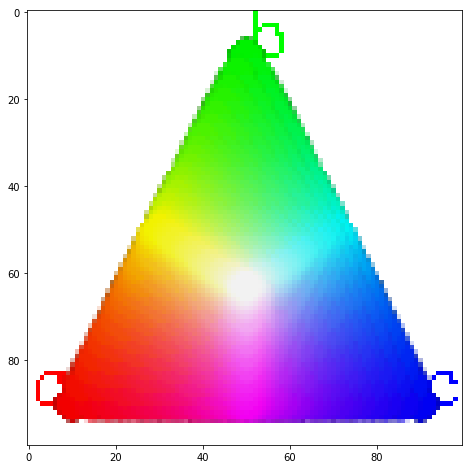

In [50]:
# We will now move around the barycentric coordinate system to draw 
# the gradient-colored triangle! -- the easy and dirty way

canvas = reset_canvas(N)
x0 = np.array([10, 90])
x1 = np.array([50, 10])
x2 = np.array([90, 90])
canvas = triangle(canvas, x0, x1, x2)

K = 20
for a in range(K):
    for b in range(K):
        for c in range(K):
            s = a + b + c
            if s == 0:
                continue
            x = np.round(a * x0 / s + b * x1 / s + c * x2 / s).astype(np.int32)
            color = (round(a * 255 / K), round(b * 255 / K), round(c * 255 / K))
            canvas = cv2.circle(canvas, tuple(x), 3, color, -1, cv2.LINE_AA)
            
show_canvas(canvas)

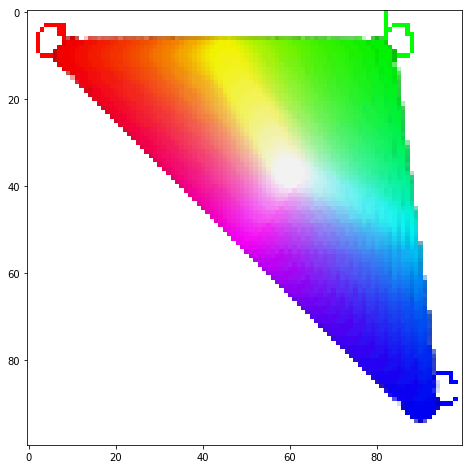

In [52]:
# What if we play around a bit with the end-points?
canvas = reset_canvas(N)
x0 = np.array([10, 10])
x1 = np.array([80, 10])
x2 = np.array([90, 90])
canvas = triangle(canvas, x0, x1, x2)

K = 20
for a in range(K):
    for b in range(K):
        for c in range(K):
            s = a + b + c
            if s == 0:
                continue
            x = np.round(a * x0 / s + b * x1 / s + c * x2 / s).astype(np.int32)
            color = (round(a * 255 / K), round(b * 255 / K), round(c * 255 / K))
            canvas = cv2.circle(canvas, tuple(x), 3, color, -1, cv2.LINE_AA)
            
show_canvas(canvas)